In [128]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

In [129]:
# Leemos el archivo "Leon.txt" con la siguiente función para empezar a trabajar.
df0 = pd.read_csv('Leon.txt', skiprows=20, sep='\s+',skipfooter=1,engine='python',names=('Fecha','Precip','Evap','Tmax','Tmin'))

In [130]:
# Imprimimos los primeros renglones de la tabla para asegurarnos de que se haya leído correctamente.
df0.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,01/01/1961,0.0,3.7,25,9
1,02/01/1961,0.0,4.7,25.5,8.5
2,03/01/1961,0.0,5.4,25,6
3,04/01/1961,0.0,4,24,6
4,05/01/1961,0.0,2.8,24.5,6


In [131]:
df = pd.DataFrame(df0)

In [132]:
# Remplazamos la palabra "Nulo" del archivo de texto por "NaN" para que python pueda leerlo como dato nulo.
df = df.replace('Nulo','NaN')

In [133]:
# Cambiamos los tipos de datos para poder empezar a trabajar con ellos de manera correcta y para que python los reconozca.
# Además cambiamos el tipo de dato de la fecha para que lo reconozca como fecha.
df['Fecha'] = pd.to_datetime(df.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df['Precip'] = df['Precip'].astype(float)
df['Evap'] = df['Evap'].astype(float)
df['Tmax'] = df['Tmax'].astype(float)
df['Tmin'] = df['Tmin'].astype(float)

In [134]:
# Checamos los tipos de datos para asegurarnos de que todo va bien.
df.dtypes

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
dtype: object

Text(0, 0.5, 'Fecha (Mes)')

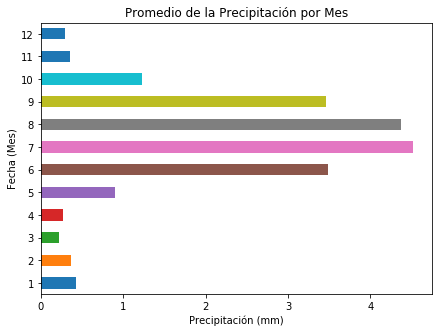

In [135]:
# Agrupamos la fecha y la columna de precipitación para así poder graficar el promedio de la precipitación en cada mes.
fig = plt.figure(figsize=(7,5))

df.groupby(df['Fecha'].dt.month)['Precip'].mean().plot(kind = 'barh')
plt.xlabel('Precipitación (mm)')
plt.legend
plt.title('Promedio de la Precipitación por Mes')
plt.ylabel('Fecha (Mes)')

Text(0.5, 0, 'Fecha (Año)')

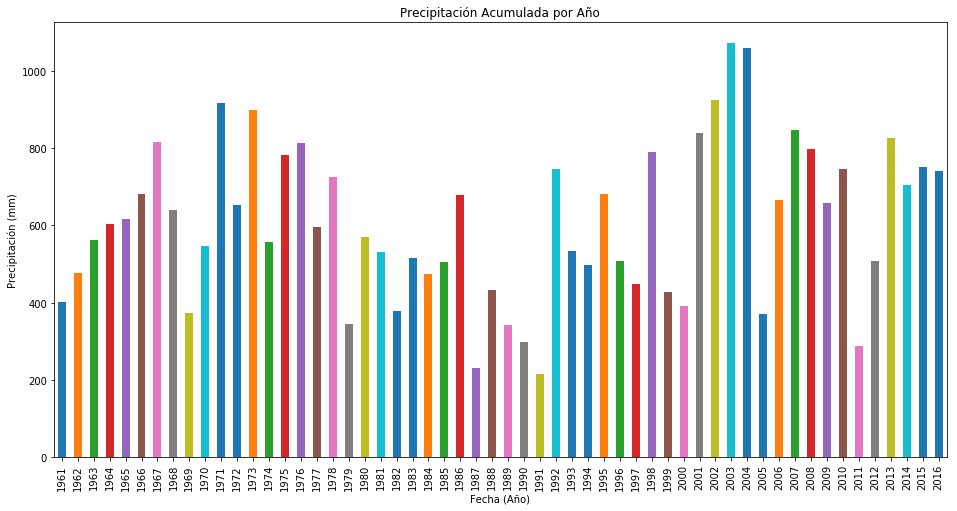

In [158]:
fig = plt.figure(figsize=(16,8))
df.groupby(df['Fecha'].dt.year)['Precip'].sum().plot(kind = 'bar')
plt.legend
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Acumulada por Año')
plt.xlabel('Fecha (Año)')

Text(0.5, 0, 'Fecha (Mes)')

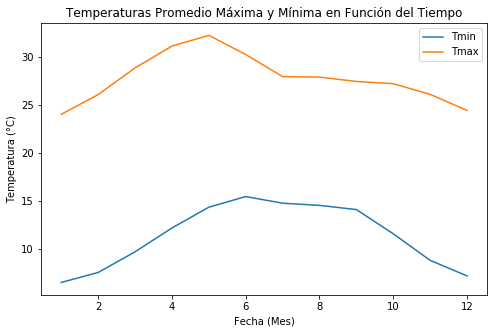

In [137]:
fig = plt.figure(figsize=(8,5))

df.groupby(df['Fecha'].dt.month)['Tmin'].mean().plot(kind = 'line', legend = 'Reverse')
df.groupby(df['Fecha'].dt.month)['Tmax'].mean().plot(kind = 'line', legend = 'Reverse')
plt.title('Temperaturas Promedio Máxima y Mínima en Función del Tiempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha (Mes)')

In [159]:
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

Text(0, 0.5, 'Temperatura (°C)')

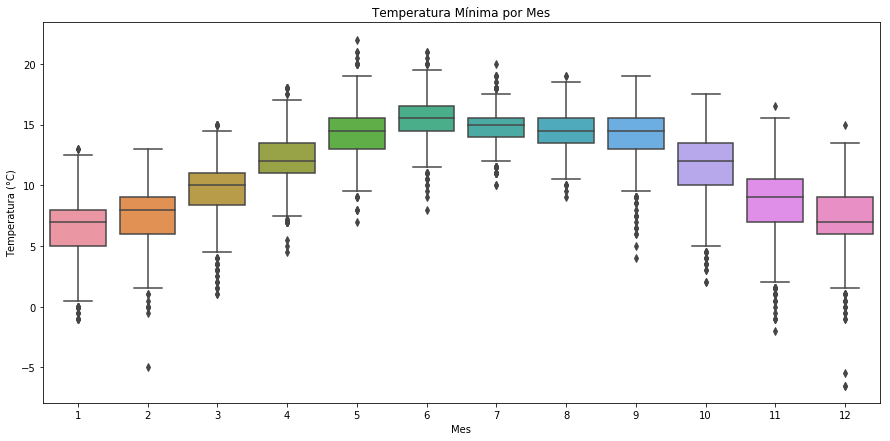

In [153]:
fig = plt.figure(figsize=(15,7))

ax = sns.boxplot(x="Mes", y="Tmin", data=df)
plt.title("Temperatura Mínima por Mes")
plt.ylabel ("Temperatura (°C)")

Text(0, 0.5, 'Temperatura (°C)')

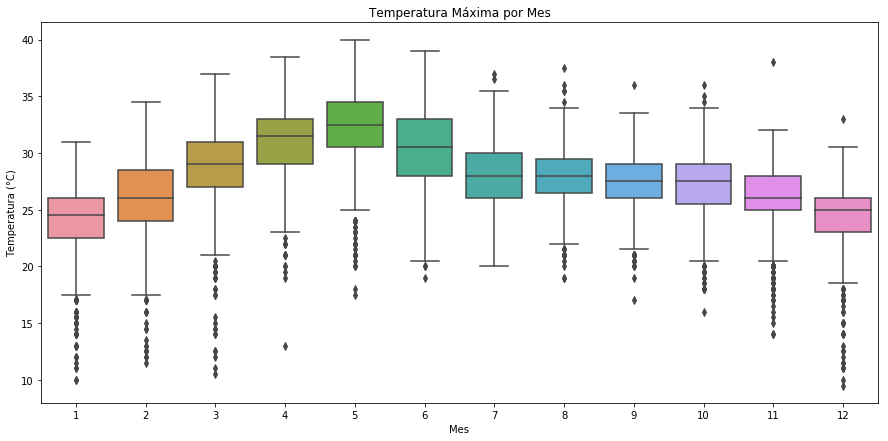

In [154]:
fig = plt.figure(figsize=(15,7))

ax = sns.boxplot(x="Mes", y="Tmax", data=df)
plt.title("Temperatura Máxima por Mes")
plt.ylabel ("Temperatura (°C)")

Text(0, 0.5, 'Temperatura (°C)')

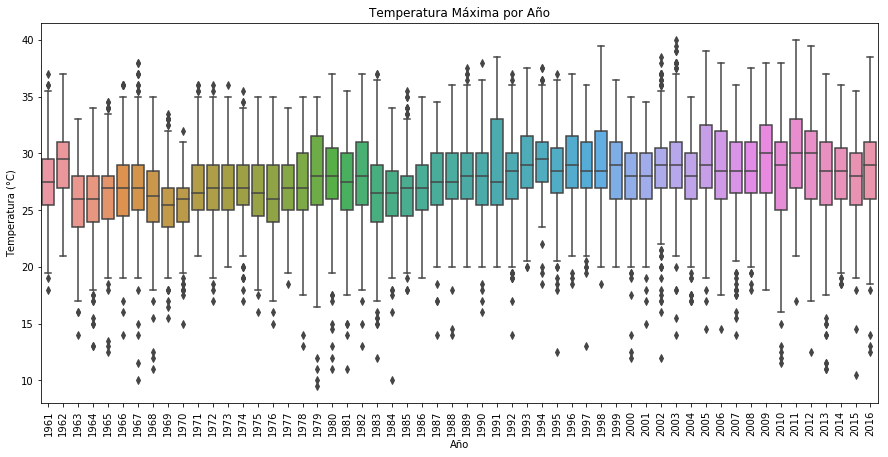

In [155]:
fig = plt.figure(figsize=(15,7))

ax = sns.boxplot(x="Año", y="Tmax", data=df)
plt.title("Temperatura Máxima por Año")
plt.xticks(rotation=90)
plt.ylabel ("Temperatura (°C)")

Text(0, 0.5, 'Temperatura (°C)')

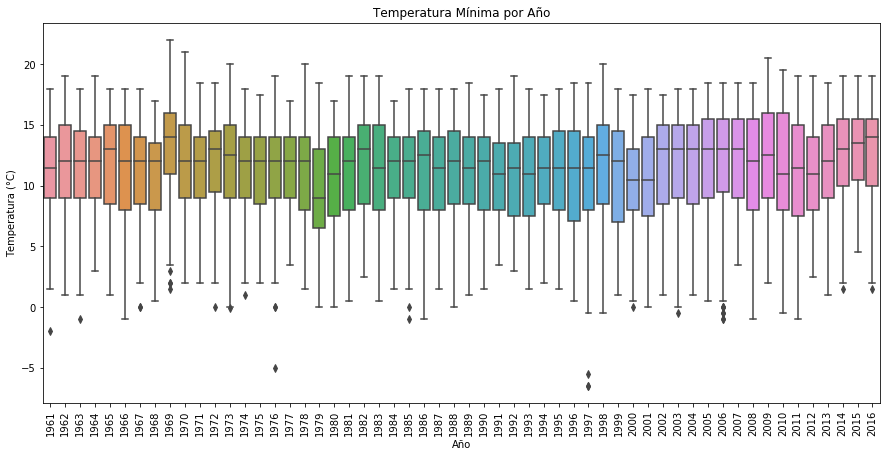

In [149]:
fig = plt.figure(figsize=(15,7))

ax = sns.boxplot(x="Año", y="Tmin", data=df)
plt.title("Temperatura Mínima por Año")
plt.xticks(rotation=90)
plt.ylabel ("Temperatura (°C)")